In [ ]:
import os
from google.colab.patches import cv2_imshow
import os
import cv2
import shutil
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_folder = '/content/drive/MyDrive/FGNET'
files = os.listdir(dataset_folder)
print(files)

['images', 'points', 'data_files', 'concat']


['004A40.JPG', '002A21.JPG', '001A43b.JPG', '002A12.JPG', '001A08.JPG', '005A18.JPG', '001A19.JPG', '003A49.JPG', '002A36.JPG', '002A03.JPG', '003A25.JPG', '004A19.JPG', '002A38.JPG', '004A28.JPG', '002A05.JPG', '003A23.JPG', '003A61.JPG', '003A18.JPG', '003A51.JPG', '002A26.JPG', '004A21.JPG', '002A07.JPG', '004A48.JPG', '003A58.JPG', '001A28.JPG', '002A16.JPG', '004A51.JPG', '004A26.JPG', '004A63.JPG', '001A18.JPG', '004A30.JPG', '003A20.JPG', '003A38.JPG', '001A02.JPG', '002A18.JPG', '004A37.JPG', '002A15.JPG', '004A62.JPG', '001A22.JPG', '003A47.JPG', '002A31.JPG', '002A04.JPG', '001A29.JPG', '003A35.JPG', '004A53.JPG', '001A33.JPG', '003A60.JPG', '002A20.JPG', '001A40.JPG', '001A16.JPG', '002A29.JPG', '002A23.JPG', '001A43a.JPG', '001A10.JPG', '029A20.JPG', '024A25.JPG', '029A04.JPG', '029A29.JPG', '015A19.JPG', '010A18.JPG', '027A13.JPG', '023A18.JPG', '008A31.JPG', '020A16.JPG', '008A18.JPG', '018A22.JPG', '013A18.JPG', '029A11.JPG', '022A28.JPG', '026A00.JPG', '014A30.JPG', '02

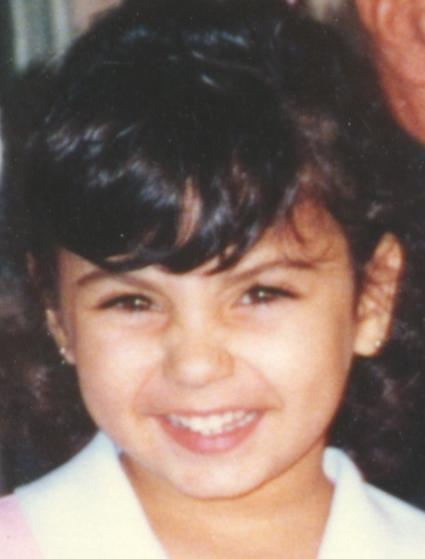

In [ ]:
# Example: Get the list of image files
image_folder = os.path.join(dataset_folder, 'images')
image_files = os.listdir(image_folder)
print(image_files)

# Example: Load and display an image
sample_image = cv2.imread(os.path.join(image_folder, image_files[75]))

# Display the image in Colab
cv2_imshow(sample_image)

In [ ]:
# Load images into a list
images = [cv2.imread(os.path.join(image_folder, img)) for img in image_files]

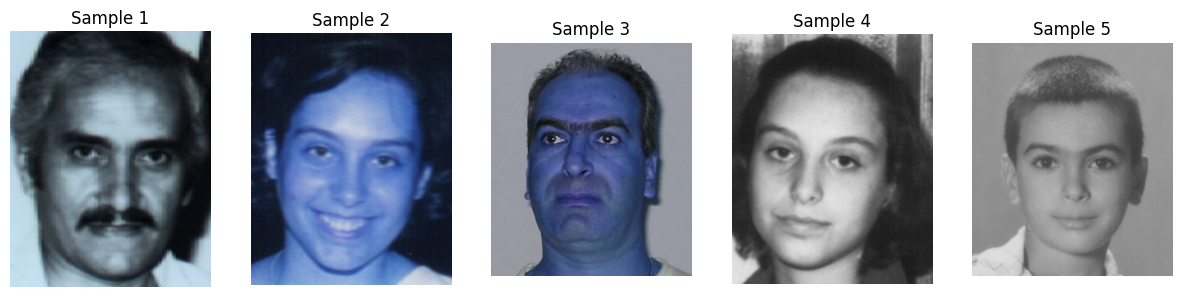

In [ ]:
num_samples = 5

plt.figure(figsize=(15, 8))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i])
    plt.title(f"Sample {i + 1}")
    plt.axis('off')

plt.show()

In [ ]:
# Load a sample image
sample_image_path = os.path.join(dataset_folder, 'images', '/content/drive/MyDrive/FGNET/images/001A02.JPG')  # Adjust the filename as needed
sample_image = cv2.imread(sample_image_path)

# Check if the image is loaded successfully
if sample_image is None:
    print(f"Error: Unable to load the image from {sample_image_path}")
else:
    print("Image loaded successfully.")


Image loaded successfully.


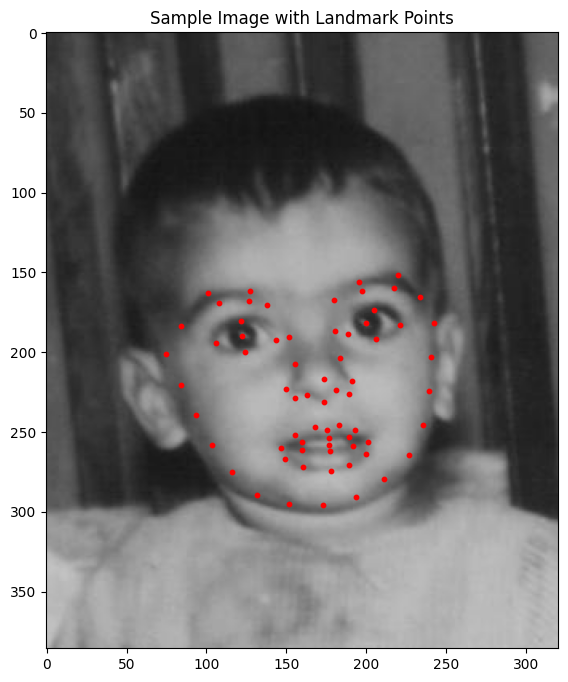

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define the dataset folder
dataset_folder = '/content/drive/MyDrive/FGNET'

# Load a sample image
sample_image_path = os.path.join(dataset_folder, 'images', '/content/drive/MyDrive/FGNET/images/001A02.JPG')  # Adjust the filename as needed
sample_image = cv2.imread(sample_image_path)

# Load corresponding landmark points
landmark_file_path = os.path.join(dataset_folder, 'points', '/content/drive/MyDrive/FGNET/points/001a02.pts')  # Adjust the filename as needed

# Read landmark points
with open(landmark_file_path, 'r') as file:
    lines = file.readlines()
    # Identify the start and end lines for coordinates
    start_line = lines.index('{\n') + 1
    end_line = lines.index('}\n')
    # Read coordinates
    landmark_data = np.loadtxt(lines[start_line:end_line], dtype=float, usecols=(0, 1))

# Convert BGR to RGB for displaying with matplotlib
sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Plot the sample image with landmark points
plt.figure(figsize=(8, 8))
plt.imshow(sample_image_rgb)
plt.scatter(landmark_data[:, 0], landmark_data[:, 1], color='red', s=10)  # Assuming red points for visibility
plt.title('Sample Image with Landmark Points')
plt.show()


In [ ]:
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split




In [ ]:
# Create a list of file paths for JPG files in the 'images' folder
image_folder = os.path.join(dataset_folder, 'images')
image_file_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith(".JPG")]

# Create a list of file paths for points files in the 'points' folder
points_folder = os.path.join(dataset_folder, 'points')
points_file_paths = [os.path.join(points_folder, filename) for filename in os.listdir(points_folder) if filename.endswith(".pts")]

# Create a list of file paths for data files in the 'data_files' folder
data_folder = os.path.join(dataset_folder, 'data_files')
data_file_paths = [os.path.join(data_folder, filename) for filename in os.listdir(data_folder) if filename.endswith(".dat")]

In [ ]:
# Define the split ratios
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

In [ ]:
# Split the data
image_train, image_test = train_test_split(image_file_paths, test_size=test_ratio, random_state=42)
image_train, image_val = train_test_split(image_train, test_size=validation_ratio / (1 - test_ratio), random_state=42)

# Associate points and data files with the respective image sets
points_train = [os.path.join(points_folder, os.path.basename(image_path).replace(".JPG", ".pts")) for image_path in image_train]
points_val = [os.path.join(points_folder, os.path.basename(image_path).replace(".JPG", ".pts")) for image_path in image_val]
points_test = [os.path.join(points_folder, os.path.basename(image_path).replace(".JPG", ".pts")) for image_path in image_test]

data_train = [os.path.join(data_folder, os.path.basename(image_path).replace(".JPG", ".dat")) for image_path in image_train]
data_val = [os.path.join(data_folder, os.path.basename(image_path).replace(".JPG", ".dat")) for image_path in image_val]
data_test = [os.path.join(data_folder, os.path.basename(image_path).replace(".JPG", ".dat")) for image_path in image_test]

In [ ]:
import os
import io
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tensorflow.keras.utils import to_categorical


In [ ]:
# Function to load and preprocess images
def load_images(file_paths):
    images = []
    for file_path in file_paths:
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(img)
    return np.array(images,dtype=object)

# Load images for training, validation, and test sets
image_train_data = load_images(image_train)
image_val_data = load_images(image_val)
image_test_data = load_images(image_test)

# Function to load and preprocess points
def load_points(file_paths):
    all_points = []
    for file_path in file_paths:
        file_path = file_path.lower().replace('mydrive', 'MyDrive').replace('fgnet', 'FGNET')
        with open(file_path, 'r') as file:
            lines = file.readlines()
            start_line = lines.index('{\n') + 1
            end_line = lines.index('}\n')
            landmark_data = np.loadtxt(lines[start_line:end_line], dtype=float, usecols=(0, 1))
            all_points.append(landmark_data)
    return np.array(all_points,dtype=object)

# Load points for training, validation, and test sets
points_train_data = load_points(points_train)
points_val_data = load_points(points_val)
points_test_data = load_points(points_test)

In [ ]:
# Function to load and preprocess data files

def load_data(file_paths):
    all_data = []
    for file_path in file_paths:
        file_path = file_path.lower().replace('mydrive', 'MyDrive').replace('fgnet', 'FGNET')
        with open(file_path, 'r') as file:
            lines = file.readlines()
            data = np.array([float(line.strip()) for line in lines])
            all_data.append(data)
    return np.array(all_data,dtype=object)



In [ ]:
import keras

In [ ]:
keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

553467096/553467096 [==============================] - 19s 0us/step


In [ ]:
keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

102967424/102967424 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np



In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Assuming you have already defined your load_images and load_points functions

# Function to extract image features using ResNet50
def extract_resnet50_features(image_data):
    # Load ResNet50 model pre-trained on ImageNet data
    resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

    # Preprocess the images
    preprocessed_images = [preprocess_input(img) for img in image_data]

    # Extract features using the pre-trained ResNet50 model
    features = [resnet_model.predict(np.expand_dims(img, axis=0))[0] for img in preprocessed_images]

    return np.array(features)

# Function to flatten points
def flatten_points(points_data):
    return np.array([point.flatten() for point in points_data])

# Load images and points for training, validation, and test sets
image_train_data = load_images(image_train)
points_train_data = load_points(points_train)

image_val_data = load_images(image_val)
points_val_data = load_points(points_val)

image_test_data = load_images(image_test)
points_test_data = load_points(points_test)

# Extract ResNet50 features for images
resnet50_features_train = extract_resnet50_features(image_train_data)
resnet50_features_val = extract_resnet50_features(image_val_data)
resnet50_features_test = extract_resnet50_features(image_test_data)

# Flatten points for training
flattened_points_train = flatten_points(points_train_data)

# Verify the shape of the extracted features
print(f"Shape of ResNet50 features for training: {resnet50_features_train.shape}")
print(f"Shape of ResNet50 features for validation: {resnet50_features_val.shape}")
print(f"Shape of ResNet50 features for testing: {resnet50_features_test.shape}")

# Verify the shape of the flattened points
print(f"Shape of flattened points for training: {flattened_points_train.shape}")


1/1 [==============================] - 0s 23ms/step
Shape of ResNet50 features for training: (800, 2048)
Shape of ResNet50 features for validation: (101, 2048)
Shape of ResNet50 features for testing: (101, 2048)
Shape of flattened points for training: (800, 136)


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import cv2

In [ ]:
# Flatten points for training
flattened_points_val = flatten_points(points_val_data)
flattened_points_test = flatten_points(points_test_data)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model with training data
rf_regressor.fit(resnet50_features_train, flattened_points_train)

# Make predictions on the validation set
predictions_val = rf_regressor.predict(resnet50_features_val)

# Evaluate the performance on the validation set
mse_val = mean_squared_error(flattened_points_val, predictions_val)
print(f"Mean Squared Error on Validation Set: {mse_val}")


Mean Squared Error on Validation Set: 754.835066828163


In [ ]:
predictions_test = rf_regressor.predict(resnet50_features_test)

# Evaluate the model on the test set
mae_test = mean_squared_error(flattened_points_test, predictions_test)
print(f'Mean Absolute Error on the test set: {mae_test}')

Mean Absolute Error on the test set: 979.7642406673382


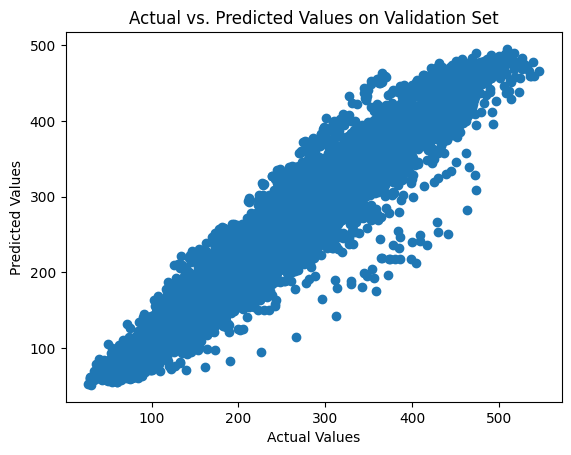

In [ ]:
plt.scatter(flattened_points_val, predictions_val)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values on Validation Set')
plt.show()


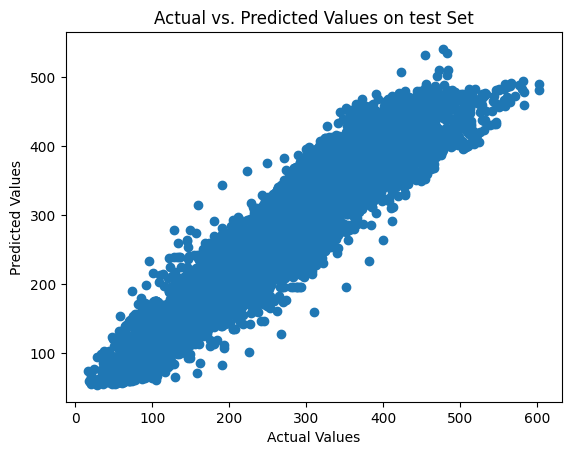

In [ ]:
plt.scatter(flattened_points_test, predictions_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values on test Set')
plt.show()

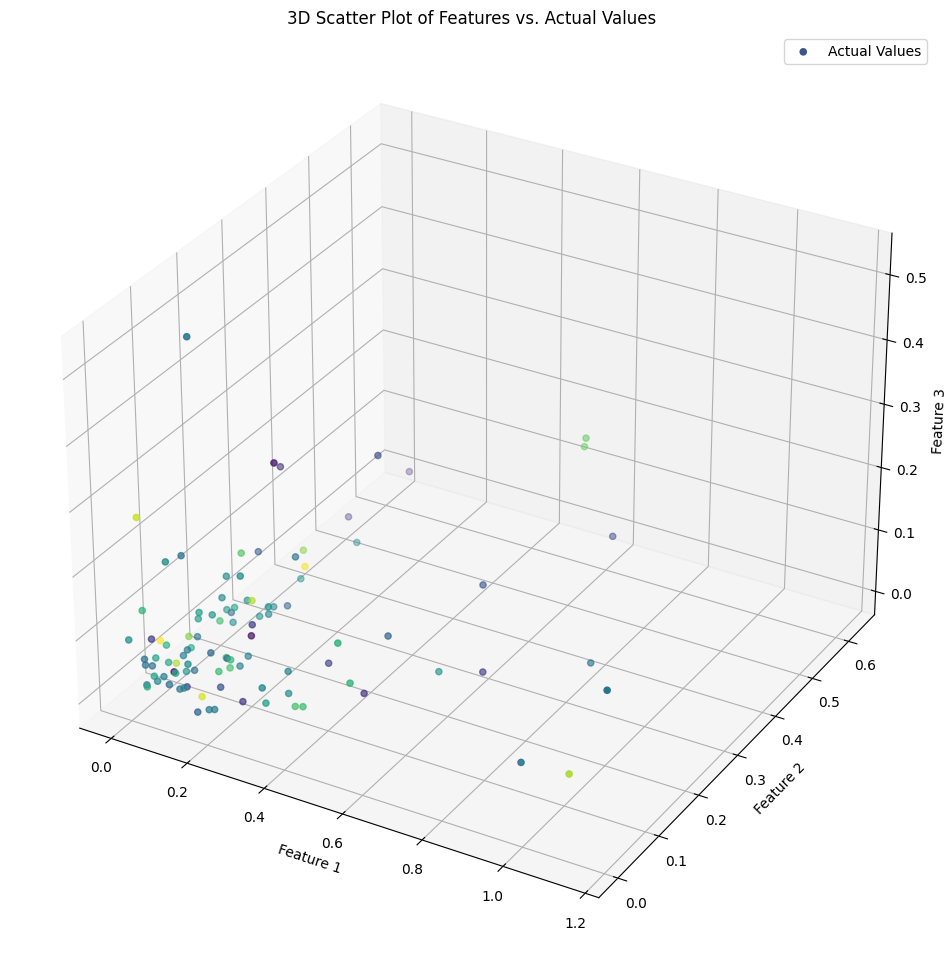

In [ ]:
# Assuming resnet50_features_test is a 2D array with five features
# Assuming you want to visualize all five features against the first column of flattened_points_test

# Select the first five features from resnet50_features_test
feature_values_1 = resnet50_features_test[:, 0]
feature_values_2 = resnet50_features_test[:, 1]
feature_values_3 = resnet50_features_test[:, 2]
feature_values_4 = resnet50_features_test[:, 3]
feature_values_5 = resnet50_features_test[:, 4]

# Select the first column from flattened_points_test
selected_column = flattened_points_test[:, 0]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature_values and the selected column
ax.scatter(feature_values_1, feature_values_2, feature_values_3, c=selected_column, cmap='viridis', label='Actual Values')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Features vs. Actual Values')

plt.legend()
plt.show()


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
import tensorflow as tf
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
import os
import time
import matplotlib.pyplot as plt
from tensorflow.keras.losses import BinaryCrossentropy



In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define the age ranges for young and old categories
young_age_range = list(range(1, 41))  # Ages 1 to 40
old_age_range = list(range(46, 71))   # Ages 46 to 70

def filter_files_by_age(file_paths, age_range):
    filtered_paths = [path for path in file_paths if any(str(age) in os.path.basename(path) for age in age_range)]
    return filtered_paths

# Function to load and preprocess images
def load_images(file_paths):
    images = []
    for file_path in file_paths:
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(img)
    return np.array(images)

# Function to load and preprocess points
def load_points(file_paths):
    all_points = []
    for file_path in file_paths:
        file_path_points = file_path.lower().replace('mydrive', 'MyDrive').replace('fgnet', 'FGNET')
        file_path_points = file_path.replace('images', 'points').replace('.JPG', '.pts')

        with open(file_path_points, 'r') as file:
            lines = file.readlines()
            start_line = lines.index('{\n') + 1
            end_line = lines.index('}\n')
            landmark_data = np.loadtxt(lines[start_line:end_line], dtype=float, usecols=(0, 1))
            all_points.append(landmark_data)
    return np.array(all_points)

# Load all image paths from the specified directory
image_directory = '/content/drive/MyDrive/FGNET/images/'
all_image_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if filename.endswith('.JPG')]

# Filter image paths for young category
image_paths_young = filter_files_by_age(all_image_paths, young_age_range)

# Filter image paths for old category
image_paths_old = filter_files_by_age(all_image_paths, old_age_range)

# Load and preprocess images for young and old categories
images_young = load_images(image_paths_young)
images_old = load_images(image_paths_old)


# Load all points paths from the specified directory
points_directory = '/content/drive/MyDrive/FGNET/points/'
all_points_paths = [os.path.join(points_directory, filename.replace('.JPG', '.pts')) for filename in os.listdir(image_directory) if filename.endswith('.JPG')]

# Filter points paths for young category
points_paths_young = filter_files_by_age(all_points_paths, young_age_range)

# Filter points paths for old category
points_paths_old = filter_files_by_age(all_points_paths, old_age_range)


# Convert POINTS file paths to lowercase
points_paths_young = [path.lower().replace('mydrive', 'MyDrive').replace('fgnet', 'FGNET') for path in points_paths_young]
points_paths_old = [path.lower().replace('mydrive', 'MyDrive').replace('fgnet', 'FGNET') for path in points_paths_old]

# Replace '.jpg' with '.pts' in points file paths
points_paths_young = [path.replace('images', 'points').replace('.JPG', '.pts') for path in image_paths_young]
points_paths_old = [path.replace('images', 'points').replace('.JPG', '.pts') for path in image_paths_old]
# Load and preprocess points for young and old categories
# Load and preprocess points for young category
points_young = load_points([path.lower().replace('mydrive', 'MyDrive').replace('fgnet', 'FGNET') for path in points_paths_young])

# Load and preprocess points for old category
points_old = load_points([path.lower().replace('mydrive', 'MyDrive').replace('fgnet', 'FGNET') for path in points_paths_old])



# You can now use images_young, images_old, points_young, and points_old to train your CycleGAN


<ipython-input-34-6df2dbc486f7>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define the age ranges for young and old categories
young_age_range = list(range(1, 41))  # Ages 1 to 40
old_age_range = list(range(46, 71))   # Ages 46 to 70

def filter_images_by_age(image_paths, age_range):
    filtered_paths = [path for path in image_paths if any(str(age) in os.path.basename(path) for age in age_range)]
    return filtered_paths

# Function to load and preprocess images
def load_images(file_paths):
    images = []
    for file_path in file_paths:
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(img)
    return np.array(images,dtype=object)

# Load all image paths from the specified directory
image_directory = '/content/drive/MyDrive/FGNET/images/'
all_image_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if filename.endswith('.JPG')]

# Filter image paths for young category
image_paths_young = filter_images_by_age(all_image_paths, young_age_range)

# Filter image paths for old category
image_paths_old = filter_images_by_age(all_image_paths, old_age_range)

# Load and preprocess images for young and old categories
images_young = load_images(image_paths_young)
images_old = load_images(image_paths_old)


In [ ]:
class CycleGAN:
    def __init__(self, batch_size=16, epochs=100, learning_rate=0.0002, image_size=(256, 256), channels=3, feature_size=2048):
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.image_size = image_size
        self.channels = channels
        self.model_name = "cyclegan"
        self.model_dir = "/content/drive/MyDrive/model_new"

        self.generator_X = self.build_generator()
        self.generator_Y = self.build_generator()
        self.discriminator_X = self.build_discriminator()
        self.discriminator_Y = self.build_discriminator()

        self.optimizer_G = Adam(learning_rate=self.learning_rate)
        self.optimizer_D = Adam(learning_rate=self.learning_rate)

        self.loss_function = BinaryCrossentropy(from_logits=True)

    def build_generator(self):
        model = models.Sequential()
        model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(alpha=0.2))

        model.add(layers.Reshape((7, 7, 256)))
        model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(alpha=0.2))

        model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(alpha=0.2))

        model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(alpha=0.2))

        model.add(layers.Conv2DTranspose(self.channels, (5, 5), strides=(2, 2), padding='same', activation='tanh'))

        return model

    def build_discriminator(self):
        model = models.Sequential()
        model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(self.image_size[0], self.image_size[1], self.channels)))
        model.add(layers.LeakyReLU(alpha=0.2))
        model.add(layers.Dropout(0.3))

        model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
        model.add(layers.LeakyReLU(alpha=0.2))
        model.add(layers.Dropout(0.3))

        model.add(layers.Flatten())
        model.add(layers.Dense(1))

        return model

    def train(self, images_young, images_old, points_young, points_old):
        train_dataset = tf.data.Dataset.from_tensor_slices(((images_young, points_young), (images_old, points_old)))
        train_dataset = train_dataset.batch(self.batch_size).shuffle(buffer_size=1000)

        for epoch in range(self.epochs):
            start_time = time.time()

            for (batch_X, features_X), (batch_Y, features_Y) in train_dataset:
                with tf.GradientTape() as tape_G, tf.GradientTape() as tape_D:
                    fake_Y = self.generator_X([batch_X, features_X])
                    fake_X = self.generator_Y([batch_Y, features_Y])

                    real_Y_output = self.discriminator_Y([batch_Y, features_Y])
                    fake_Y_output = self.discriminator_Y([fake_Y, features_Y])

                    real_X_output = self.discriminator_X([batch_X, features_X])
                    fake_X_output = self.discriminator_X([fake_X, features_X])

                    loss_G_Y = self.loss_function(tf.ones_like(real_Y_output), fake_Y_output)
                    loss_G_X = self.loss_function(tf.ones_like(real_X_output), fake_X_output)

                    loss_D_Y = self.loss_function(tf.ones_like(real_Y_output), real_Y_output) + self.loss_function(tf.zeros_like(fake_Y_output), fake_Y_output)
                    loss_D_X = self.loss_function(tf.ones_like(real_X_output), real_X_output) + self.loss_function(tf.zeros_like(fake_X_output), fake_X_output)

                gradients_of_G = tape_G.gradient(loss_G_Y + loss_G_X, self.generator_Y.trainable_variables + self.generator_X.trainable_variables)
                gradients_of_D = tape_D.gradient(loss_D_Y + loss_D_X, self.discriminator_Y.trainable_variables + self.discriminator_X.trainable_variables)

                self.optimizer_G.apply_gradients(zip(gradients_of_G, self.generator_Y.trainable_variables + self.generator_X.trainable_variables))
                self.optimizer_D.apply_gradients(zip(gradients_of_D, self.discriminator_Y.trainable_variables + self.discriminator_X.trainable_variables))

            end_time = time.time()

            print("Epoch {}/{} - Time: {} - Loss_G_Y: {} - Loss_G_X: {} - Loss_D_Y: {} - Loss_D_X: {}".format(epoch + 1, self.epochs, end_time - start_time, loss_G_Y, loss_G_X, loss_D_Y, loss_D_X))

            if (epoch + 1) % 10 == 0:
                self.save_model()

    def save_model(self):
        if not os.path.exists(self.model_dir):
            os.makedirs(self.model_dir)

        self.generator_X.save(os.path.join(self.model_dir, "generator_X.h5"))
        self.generator_Y.save(os.path.join(self.model_dir, "generator_Y.h5"))
        self.discriminator_X.save(os.path.join(self.model_dir, "discriminator_X.h5"))
        self.discriminator_Y.save(os.path.join(self.model_dir, "discriminator_Y.h5"))

    def load_model(self):
        self.generator_X = tf.keras.models.load_model(os.path.join(self.model_dir, "generator_X.h5"))
        self.generator_Y = tf.keras.models.load_model(os.path.join(self.model_dir, "generator_Y.h5"))
        self.discriminator_X = tf.keras.models.load_model(os.path.join(self.model_dir, "discriminator_X.h5"))
        self.discriminator_Y = tf.keras.models.load_model(os.path.join(self.model_dir, "discriminator_Y.h5"))

    def generate_images(self, images_young, images_old, points_young, points_old):
        fake_Y = self.generator_X([images_young, points_young])
        fake_X = self.generator_Y([images_old, points_old])

        fig, axs = plt.subplots(2, 2)
        axs[0, 0].imshow(images_young[0])
        axs[0, 1].imshow(fake_Y[0])
        axs[1, 0].imshow(images_old[0])
        axs[1, 1].imshow(fake_X[0])
        plt.show()

In [ ]:
# prompt: CODE FOR DE AGE THE INPUT IMAGE /content/drive/MyDrive/FGNET/images/006A69.JPG USING CYCLE GAN ABOVE CELL


# Load the images
image_path = "/content/drive/MyDrive/FGNET/images/006A69.JPG"
image = Image.open(image_path)

# Preprocess the images
image = image.resize((224, 224))
image = image.convert("RGB")
image = img_to_array(image)
image = preprocess_input(image)

# Load the generator model
generator = keras.models.load_model("/content/drive/MyDrive/model_new")

# Generate the de-aged image
de_aged_image = generator.predict(image[np.newaxis, ...])

# Save the de-aged image
de_aged_image = de_aged_image.squeeze()
de_aged_image = de_aged_image.astype("uint8")
de_aged_image = Image.fromarray(de_aged_image)
de_aged_image.save("/content/drive/MyDrive/FGNET/images/006A69_de-aged.jpg")


1/1 [==============================] - 0s 142ms/step
